# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [1]:
from commonfunctions import *
import scipy as sc
from scipy.ndimage import gaussian_filter
%matplotlib inline
%load_ext autoreload
%autoreload 2

ImportError: cannot import name 'geometry' from 'skimage._shared' (C:\Users\Mazen Amr\Anaconda3\lib\site-packages\skimage\_shared\__init__.py)
It seems that scikit-image has not been built correctly.

Your install of scikit-image appears to be broken.
Try re-installing the package following the instructions at:
http://scikit-image.org/docs/stable/install.html 

In [2]:
def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

In [3]:
'''
1. Built-in Sobel, Prewill, Roberts
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewill, Roberts\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

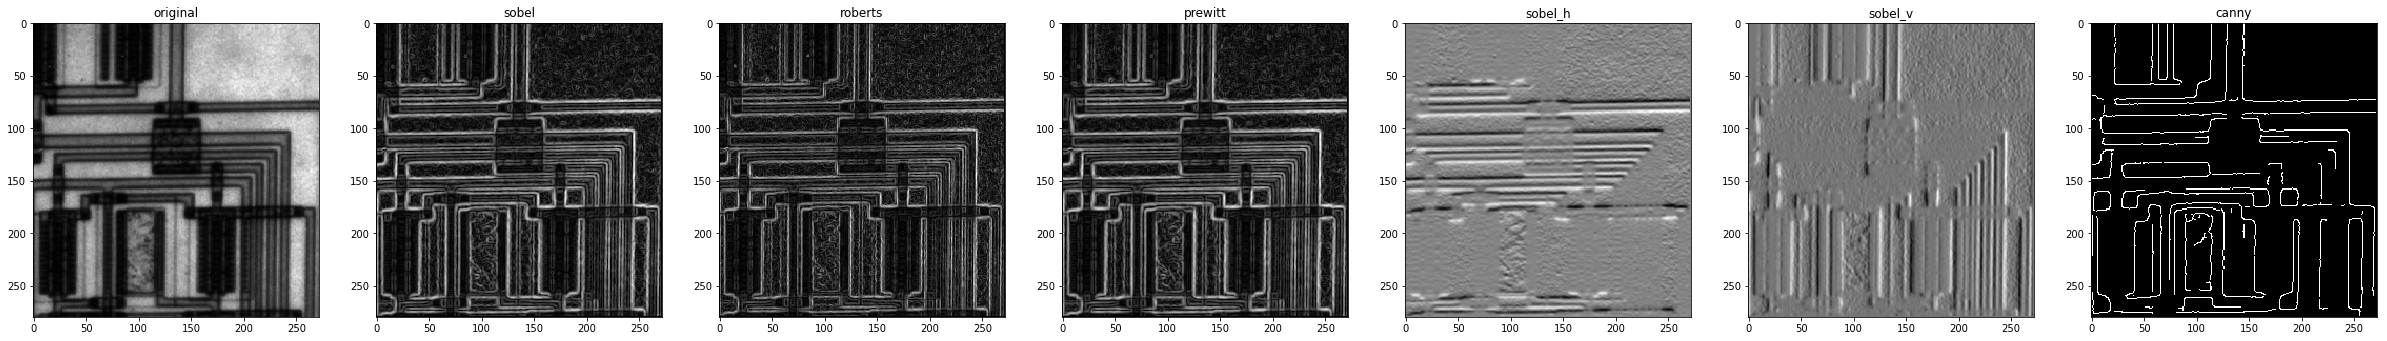

In [50]:
# 1. Built-in Sobel, Prewill, Roberts

img = rgb2gray(io.imread('circuit.tif'))
img2 = sobel(img)
img3 = roberts(img)
img4 = prewitt(img)
img5 = sobel_h(img)
img6 = sobel_v(img)
img7 = canny(img,sigma=2,low_threshold=40,high_threshold=50)
show_images([img,img2,img3,img4,img5,img6,img7],["original","sobel","roberts","prewitt","sobel_h","sobel_v","canny"])

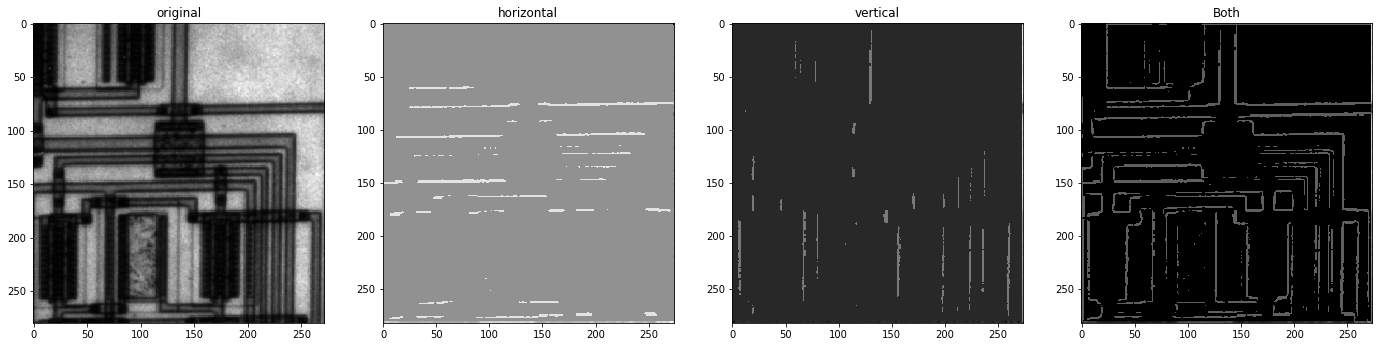

In [30]:
# 2. Custom Sobel (V-H-Both)
def custom_sobel(img):
    s_v=[[-1,0,1],[-2,0,2],[-1,0,1]]
    s_h=[[-1,-2,-1],[0,0,0],[1,2,1]]
    img1 = convolve2d(img,s_h)
    img2 = convolve2d(img,s_v)
    return [img1,img2]
img=io.imread('circuit.tif')
img1,img2 = custom_sobel(img)
img3=np.sqrt(np.square(img1)+np.square(img2))
thres = 150
for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            if(img3[i][j]<thres):
                img3[i][j]=0
            else:
                img3[i][j]=255
            if(img1[i][j]<thres):
                img1[i][j]=0
            else:
                img1[i][j]=255
            if(img2[i][j]<thres):
                img2[i][j]=0
            else:
                img2[i][j]=255

show_images([img,img1,img2,img3],["original","horizontal","vertical","Both"])

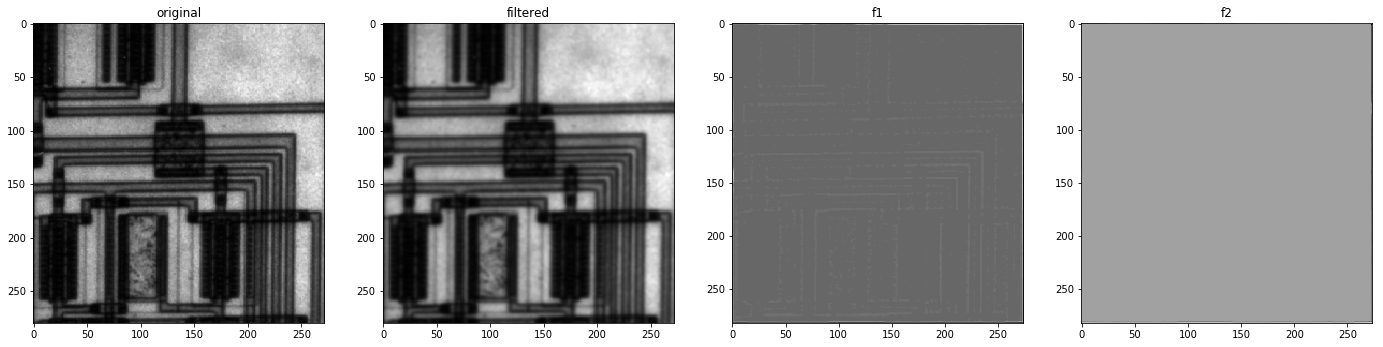

In [19]:
# 3. Custom LoG
def LOG(img):
    thres= 20
    f1=[[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]
    f2=[[0,1,0],[1,-4,1],[0,1,0]]
    img2 = gaussian_filter(img,sigma=1)
    img3 = convolve2d(img2,f1)
    img4 = convolve2d(img2,f2)
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            if(img3[i][j]<thres):
                img3[i][j]=0
            if(img4[i][j]<thres):
                img4[i][j]=0
    show_images([img,img2,img3,img4],["original","filtered","f1","f2"])
img=io.imread('circuit.tif')
LOG(img)